In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
country_data = pd.read_csv("CSV_Output/11_country.csv")
country_data.head()

,Unnamed: 0,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instramentalness,...,Valence,Tempo,Type,ID,URI,Track Href,Analysis URL,Duration (ms),Time Signature,Country
0,0,Without You,0.669,0.698,11,-4.613,1,0.0910,0.571,0.000000,...,0.286,80.003,audio_features,0KWnRv3wxjltYVB3MqjNd2,spotify:track:0KWnRv3wxjltYVB3MqjNd2,https://api.spotify.com/v1/tracks/0KWnRv3wxjlt...,https://api.spotify.com/v1/audio-analysis/0KWn...,175500,4,Taiwan
1,1,句號,0.720,0.480,10,-8.552,1,0.0604,0.248,0.000000,...,0.464,143.945,audio_features,66YKSygcUZHHqHJZcWslI3,spotify:track:66YKSygcUZHHqHJZcWslI3,https://api.spotify.com/v1/tracks/66YKSygcUZHH...,https://api.spotify.com/v1/audio-analysis/66YK...,235632,4,Taiwan
2,2,Yummy,0.662,0.519,9,-6.554,0,0.1060,0.404,0.000000,...,0.495,145.841,audio_features,41L3O37CECZt3N7ziG2z7l,spotify:track:41L3O37CECZt3N7ziG2z7l,https://api.spotify.com/v1/tracks/41L3O37CECZt...,https://api.spotify.com/v1/audio-analysis/41L3...,210427,4,Taiwan
3,3,Dance Monkey,0.824,0.588,6,-6.400,0,0.0924,0.692,0.000104,...,0.513,98.027,audio_features,2XU0oxnq2qxCpomAAuJY8K,spotify:track:2XU0oxnq2qxCpomAAuJY8K,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,https://api.spotify.com/v1/audio-analysis/2XU0...,209438,4,Taiwan
4,4,Why You Gonna Lie,0.768,0.760,7,-3.729,1,0.1050,0.763,0.000000,...,0.736,90.000,audio_features,1rjUBUTswCkN8DIBxkgjJs,spotify:track:1rjUBUTswCkN8DIBxkgjJs,https://api.spotify.com/v1/tracks/1rjUBUTswCkN...,https://api.spotify.com/v1/audio-analysis/1rjU...,174000,4,Taiwan


In [3]:
del country_data['Unnamed: 0']

In [5]:
global_data = pd.read_csv("CSV_Output/Global_top_50_songs.csv")
global_data.head()

,Unnamed: 0,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instramentalness,Liveness,Valence,Tempo,Type,ID,URI,Track Href,Analysis URL,Duration (ms),Time Signature
0,0,Dance Monkey,0.824,0.588,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,audio_features,2XU0oxnq2qxCpomAAuJY8K,spotify:track:2XU0oxnq2qxCpomAAuJY8K,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,https://api.spotify.com/v1/audio-analysis/2XU0...,209438,4
1,1,The Box,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
2,2,Life Is Good (feat. Drake),0.676,0.609,2,-5.831,0,0.4810,0.0706,0.000000,0.1520,0.508,142.037,audio_features,5yY9lUy8nbvjM1Uyo1Uqoc,spotify:track:5yY9lUy8nbvjM1Uyo1Uqoc,https://api.spotify.com/v1/tracks/5yY9lUy8nbvj...,https://api.spotify.com/v1/audio-analysis/5yY9...,237735,4
3,3,Yummy,0.662,0.519,9,-6.554,0,0.1060,0.4040,0.000000,0.1210,0.495,145.841,audio_features,41L3O37CECZt3N7ziG2z7l,spotify:track:41L3O37CECZt3N7ziG2z7l,https://api.spotify.com/v1/tracks/41L3O37CECZt...,https://api.spotify.com/v1/audio-analysis/41L3...,210427,4
4,4,Tusa,0.803,0.715,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,audio_features,7k4t7uLgtOxPwTpFmtJNTY,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,https://api.spotify.com/v1/audio-analysis/7k4t...,200960,4


In [6]:
del global_data['Unnamed: 0']

In [13]:
danceability_allcountry = country_data["Danceability"]
daneability_global = global_data["Danceability"]

energy_allcountry = country_data["Energy"]
energy_global = global_data["Energy"]

valence_allcountry = country_data["Valence"]
valence_global = global_data["Valence"]

loudness_allcountry=country_data["Loudness"]
loudness_global=global_data["Loudness"]

acousticness_allcountry=country_data["Acousticness"]
acousticness_global=global_data["Acousticness"]

instramentalness_allcountry=country_data["Instramentalness"]
instramentalness_global=global_data["Instramentalness"]

time_allcountry =country_data["Time Signature"]
time_global = global_data["Time Signature"]

tempo_allcountry = country_data["Tempo"]
tempo_global = global_data["Tempo"]


stats_danceability = stats.f_oneway(danceability_allcountry,daneability_global)
stats_energy = stats.f_oneway(energy_allcountry,energy_global)
stats_valence = stats.f_oneway(valence_allcountry,valence_global)
stats_loudness = stats.f_oneway(loudness_allcountry,loudness_global)
stats_tempo = stats.f_oneway (tempo_allcountry,tempo_global)
stats_time = stats.f_oneway(time_allcountry,time_global)

stats_instramentalness=stats.f_oneway(instramentalness_allcountry,instramentalness_global)
stats_acousticness=stats.f_oneway(acousticness_allcountry,acousticness_global)

In [23]:
stats_df = pd.DataFrame({
    "1-way Stats":["Statistic","p-value"],
    "Danceability":stats_danceability,
    "Energy":stats_energy,
    "Valence":stats_valence,
    "Loudness":stats_loudness,
    "Tempo":stats_tempo,
    "Time Signature":stats_time,
    "Instramentalness":stats_instramentalness,
    "Acousticness":stats_acousticness
})
stats_df

,1-way Stats,Danceability,Energy,Valence,Loudness,Tempo,Time Signature,Instramentalness,Acousticness
0,Statistic,2.554402,0.981464,0.026979,0.002024,0.699553,0.000957,0.013454,1.931195
1,p-value,0.110516,0.322238,0.869588,0.964132,0.403268,0.975337,0.907697,0.165145


In [24]:
stats_df.to_csv("1way_statistic on 11 country data vs global result.csv", index =False)

In [28]:
danceability_ttest = stats.ttest_1samp(global_data["Danceability"], country_data["Danceability"].mean())
energy_ttest = stats.ttest_1samp(global_data["Energy"], country_data["Energy"].mean())
valence_ttest = stats.ttest_1samp(global_data["Valence"], country_data["Valence"].mean())
loudness_ttest = stats.ttest_1samp(global_data["Loudness"], country_data["Loudness"].mean())
tempo_ttest = stats.ttest_1samp(global_data["Tempo"], country_data["Tempo"].mean())
time_ttest = stats.ttest_1samp(global_data["Time Signature"], country_data["Time Signature"].mean())
instramental_ttest = stats.ttest_1samp(global_data["Instramentalness"], country_data["Instramentalness"].mean())
acoustic_ttest=stats.ttest_1samp(global_data["Acousticness"], country_data["Acousticness"].mean())

In [31]:
twoway_stats_df =pd.DataFrame({
    "2-way Stats":["Statistic","p-value"],
    "Danceability":danceability_ttest,
    "Energy":energy_ttest,
    "Valence":valence_ttest,
    "Loudness":loudness_ttest,
    "Tempo":tempo_ttest,
    "Time Signature":time_ttest,
    "Instramentalness":instramental_ttest,
    "Acousticness":acoustic_ttest
})
twoway_stats_df

,2-way Stats,Danceability,Energy,Valence,Loudness,Tempo,Time Signature,Instramentalness,Acousticness
0,Statistic,1.717715,-1.228101,-0.161223,0.052473,-0.898140,0.027159,-0.135284,-1.581679
1,p-value,0.092163,0.225276,0.872581,0.958365,0.373503,0.978443,0.892941,0.120157


In [30]:
twoway_stats_df.to_csv("Ttest_11-country_data_vs_Global.csv",index=False)

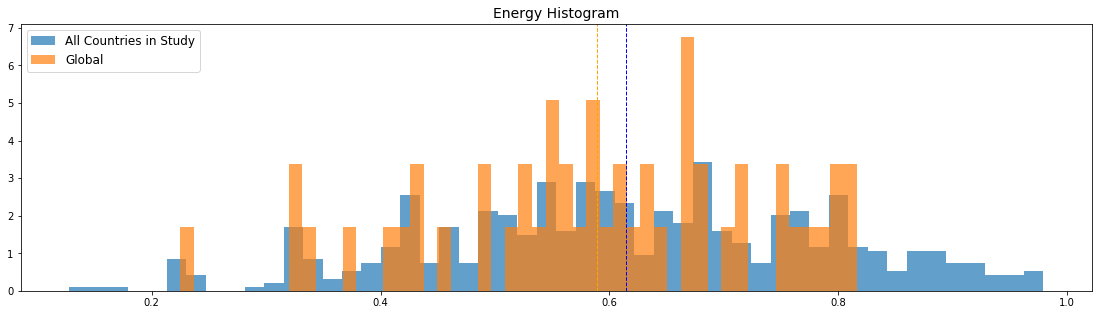

In [106]:
    #plt.subplot(2, 1, 1)
   # plt.scatter(range(len(country_data["Energy"])), country_data["Energy"], label="All Countries in Study")
   # plt.scatter(range(len(global_data["Energy"])), global_data["Energy"], label="Global")
   # plt.legend(loc='lower right')

    # Histogram Plot of Data
    plt.figure(figsize=(19.20,10.80))
    plt.subplot(2, 1, 2)
    plt.hist(country_data["Energy"], 50, density=True, alpha=0.7, label="All Countries in Study")
    plt.hist(global_data["Energy"], 50, density=True, alpha=0.7, label="Global")
    plt.axvline(country_data["Energy"].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(global_data["Energy"].mean(), color='orange', linestyle='dashed', linewidth=1)
    plt.legend(loc='upper left',fontsize=12)  
    plt.title("Energy Histogram",fontsize=14)
   
    plt.savefig("Energy_countries_vs_global.png")
    plt.show()

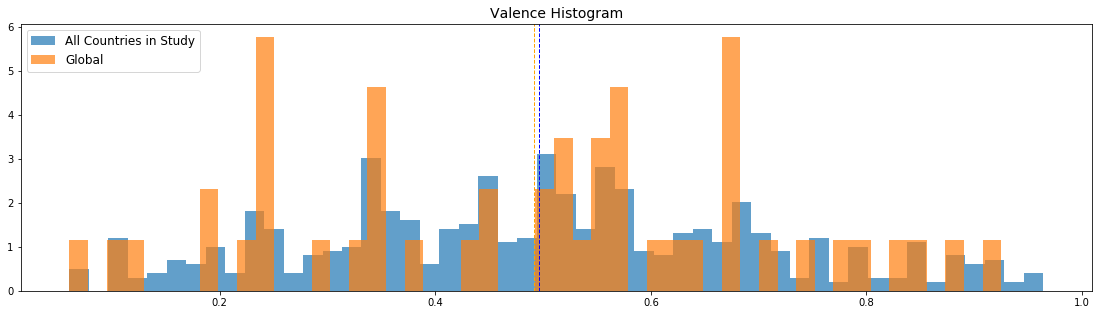

In [107]:
    #Scatter plot
  #  plt.subplot(2, 1, 1)
  #  plt.scatter(range(len(country_data["Valence"])), country_data["Valence"], label="All Countries in Study")
  #  plt.scatter(range(len(global_data["Valence"])), global_data["Valence"], label="Global")
   # plt.legend(loc='lower right')

    # Histogram Plot of Data
    plt.figure(figsize=(19.20,10.80))
    plt.subplot(2, 1, 2)
    plt.hist(country_data["Valence"],50 , density=True, alpha=0.7, label="All Countries in Study")
    plt.hist(global_data["Valence"], 50, density=True, alpha=0.7, label="Global")
    plt.axvline(country_data["Valence"].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(global_data["Valence"].mean(), color='orange', linestyle='dashed', linewidth=1)
    plt.legend(loc='upper left',fontsize=12)  
    plt.title("Valence Histogram",fontsize=14)
   
    plt.savefig("Valence_countries_vs_global.png")
    plt.show()

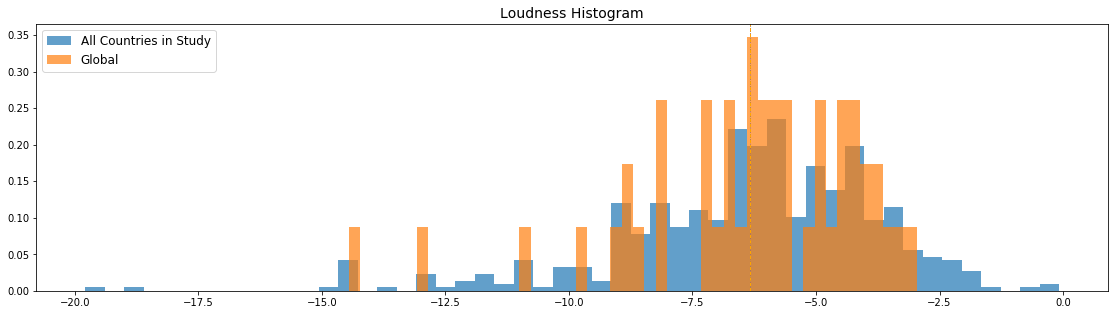

In [108]:
    #Scatter plot
    #plt.subplot(2, 1, 1)
  #  plt.scatter(range(len(country_data["Loudness"])), country_data["Loudness"], label="All Countries in Study")
   # plt.scatter(range(len(global_data["Loudness"])), global_data["Loudness"], label="Global")
  #  plt.legend(loc='lower right')

    # Histogram Plot of Data
    
    plt.figure(figsize=(19.20,10.80))
    plt.subplot(2, 1, 2)
    plt.hist(country_data["Loudness"],50 , density=True, alpha=0.7, label="All Countries in Study")
    plt.hist(global_data["Loudness"], 50, density=True, alpha=0.7, label="Global")
    plt.axvline(country_data["Loudness"].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(global_data["Loudness"].mean(), color='orange', linestyle='dashed', linewidth=1)
    plt.legend(loc='upper left',fontsize=12)  
    plt.title("Loudness Histogram",fontsize=14)
   
    plt.savefig("Loudness_countries_vs_global.png")
    plt.show()

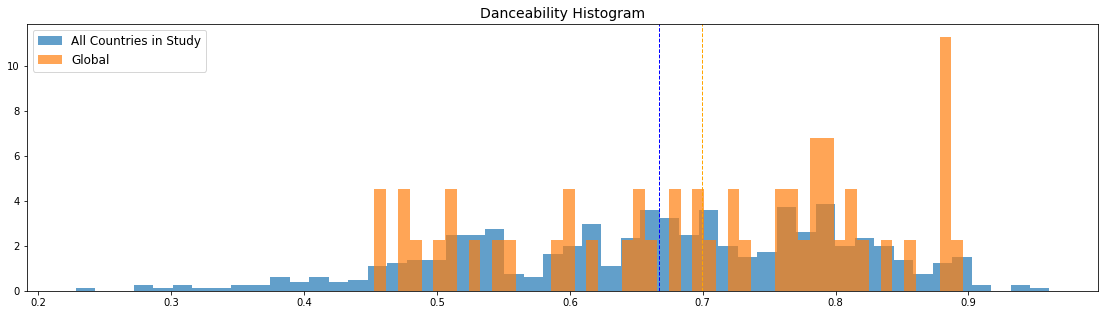

In [109]:
    #Scatter plot
   # plt.subplot(2, 1, 1)
   # plt.scatter(range(len(country_data["Danceability"])), country_data["Danceability"], label="All Countries in Study")
   # plt.scatter(range(len(global_data["Danceability"])), global_data["Danceability"], label="Global")
   # plt.legend(loc='lower right')

    # Histogram Plot of Data
    plt.figure(figsize=(19.20,10.80))
    plt.subplot(2, 1, 2)
    plt.hist(country_data["Danceability"],50 , density=True, alpha=0.7, label="All Countries in Study")
    plt.hist(global_data["Danceability"], 50, density=True, alpha=0.7, label="Global")
    plt.axvline(country_data["Danceability"].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(global_data["Danceability"].mean(), color='orange', linestyle='dashed', linewidth=1)
    plt.legend(loc='upper left',fontsize=12)  
    plt.title("Danceability Histogram",fontsize=14)
   
    plt.savefig("Danceability_countries_vs_global.png")
    plt.show()

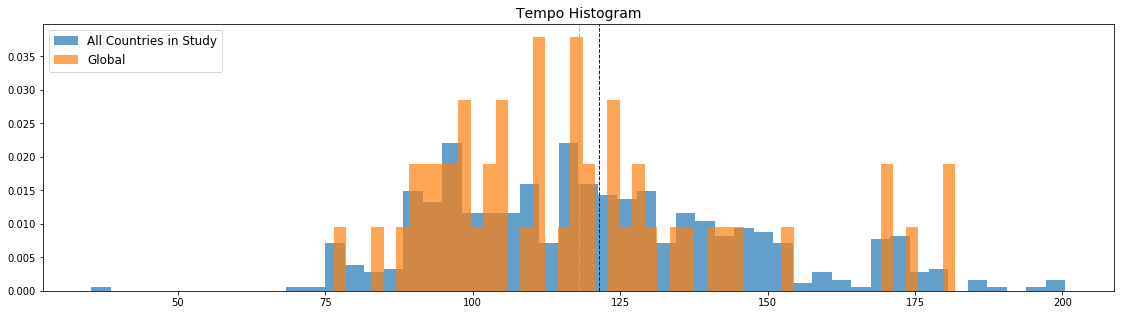

In [110]:
    plt.figure(figsize=(19.20,10.80))
    plt.subplot(2, 1, 2)
    plt.hist(country_data["Tempo"],50 , density=True, alpha=0.7, label="All Countries in Study")
    plt.hist(global_data["Tempo"], 50, density=True, alpha=0.7, label="Global")
    plt.axvline(country_data["Tempo"].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(global_data["Tempo"].mean(), color='orange', linestyle='dashed', linewidth=1)
    plt.legend(loc='upper left',fontsize=12)  
    plt.title("Tempo Histogram",fontsize=14)
   
    plt.savefig("Tempo_countries_vs_global.png")
    plt.show()

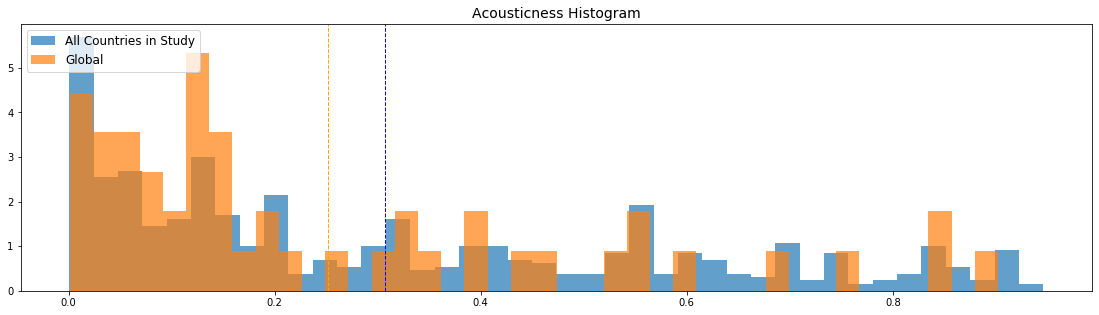

In [111]:
plt.figure(figsize=(19.20,10.80))
plt.subplot(2, 1, 2)
plt.hist(country_data["Acousticness"],40 , density=True, alpha=0.7, label="All Countries in Study")
plt.hist(global_data["Acousticness"],40, density=True, alpha=0.7, label="Global")
plt.axvline(country_data["Acousticness"].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(global_data["Acousticness"].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left',fontsize=12)  
plt.title("Acousticness Histogram",fontsize=14)
plt.savefig("Acousticness_countries_vs_global.png")
plt.show()

In [112]:
global_data['Time Signature'].max()

5

In [113]:
country_data['Time Signature'].max()

5